In [3]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
%matplotlib inline

In [2]:
cwd = os.path.split(os.getcwd())[0]
train_csv_path = os.path.join(cwd, 'data', 'train.csv')
test_csv_path = os.path.join(cwd, 'data', 'test.csv')
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

In [3]:
train_df.tail(10)

,itemid,title,Category,image_path
666605,1507136447,ipad mini 3 16gb wifi cell 4g lte second fulls...,35,mobile_image/4f07fd3529a5b44e95a3646291fa00f7.jpg
666606,1507150396,stok terbatas samsung galaxy j4 2gb 32gb garan...,32,mobile_image/af2ce434de94ce997c9960dd7c6d3420.jpg
666607,1507459413,stok terbatas iphone 6s 128gb fu second origin...,31,mobile_image/360104cd7006c0aa7c9365312ae40501.jpg
666608,1510035980,iphone 8 64gb red,31,mobile_image/4bd23a85f190ca5d416904a709274b1e.jpg
666609,1510470376,samsung note 9 rom 128gb ram 6gb new resmi kre...,32,mobile_image/2bbbf3ed6fcfa0480278ea1b50557ac4.jpg
666610,1510771637,beli 2 gratis 1 xiaomi mi mix black 6 64 rom g...,34,mobile_image/70e0d8ddd69692b0f134498efbddf4e1.jpg
666611,1515822742,android i phone x real 4g 16gb free wireless c...,35,mobile_image/d58393fe029ba62160d2a5d1fa6638a1.jpg
666612,1516747666,xiaomi mia1 ram 4gb 64gb black,34,mobile_image/bfacb3c9af2f6a597008e57fb2d34609.jpg
666613,1517270941,khusus hari ini samsung j2 prime,32,mobile_image/42d74ab8212a24720d42e84c649ab488.jpg
666614,1518889125,oppo a83 2 gb new garansi resmi 1 tahun,41,mobile_image/0b10f33a67ccb4ee3e1240d44c2ee0ef.jpg


In [4]:
test_df.head(10)

,itemid,title,image_path
0,370855998,flormar 7 white cream bb spf 30 40ml,beauty_image/1588591395c5a254bab84042005f2a9f.jpg
1,637234604,maybelline clear smooth all in one bb cream sp...,beauty_image/920985ed9587ea20f58686ea74e20f93.jpg
2,690282890,murah innisfree eco natural green tea bb cream...,beauty_image/90b40e5710f54352b243fcfb0f5d1d7f.jpg
3,930913462,loreal white perfect day cream spf 17 pa white...,beauty_image/289c668ef3d70e1d929d602d52d5d78a.jpg
4,1039280071,hada labo cc cream ultimate anti aging spf 35 ...,beauty_image/d5b3e652c5822d2306f4560488ec30c6.jpg
5,1327710392,cathy doll cc speed white powder pact spf 40 o...,beauty_image/e1e50828d5594721a7d5d5c1ff78afbd.jpg
6,1328802799,safi white natural brightening cream 45g,beauty_image/97ec852d5afc5d82ac02b80083cf292f.jpg
7,1330468145,light beige 03 bioaqua bb cushion exquisite de...,beauty_image/8ce1a5fe546f0cc795329bad599a8d5a.jpg
8,1677309730,new produk missha m perfect bb cream share in ...,beauty_image/755fcc85c687e8cb53d2a8d43ebfe251.jpg
9,1683142205,ready laneige bb cushion anti aging spf 50 pa,beauty_image/34b56398c099505c650cf2447dc9f21f.jpg


#### Here we can see that the distribution of examples per categories are very skewed, meaning we might have to do some dataset balancing or under/oversampling.

In [22]:
train_df['Category'].value_counts()

3     81250
18    56598
5     55279
4     42688
25    33922
26    33845
35    30590
32    29754
1     28670
31    27836
12    21782
20    19978
41    19312
27    16199
22    15225
34    14718
19    13493
7     11668
2     11544
42    10502
21    10483
9      8106
28     6493
43     6147
8      6048
33     4821
38     4703
24     4251
11     4108
0      3772
29     3338
13     2982
17     2765
14     2735
37     2272
16     2228
45     2195
6      2047
23     1671
30     1441
10     1077
36     1028
47      945
44      920
39      697
46      684
15      599
49      573
53      418
48      416
51      404
40      327
54      300
50      282
56      170
55      151
52      117
57       48
Name: Category, dtype: int64

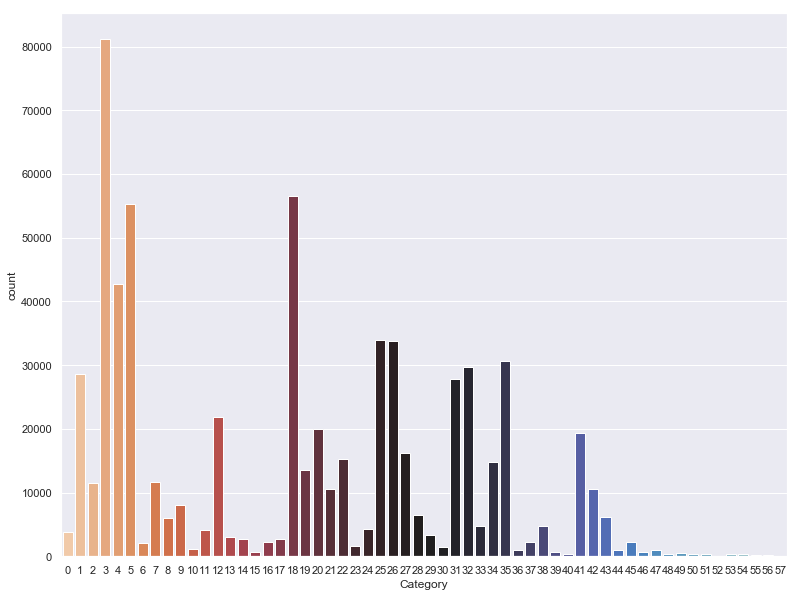

In [5]:
sns.set(rc={'figure.figsize':(13,10)})
sns.countplot(x='Category', data=train_df, palette='icefire_r')

In [6]:
train_df['image_path_category'] = train_df['image_path'].map(
    lambda path: os.path.split(path)[0])
test_df['image_path_category'] = test_df['image_path'].map(
    lambda path: os.path.split(path)[0])

#### It seems like the train and test sets are split with stratification.

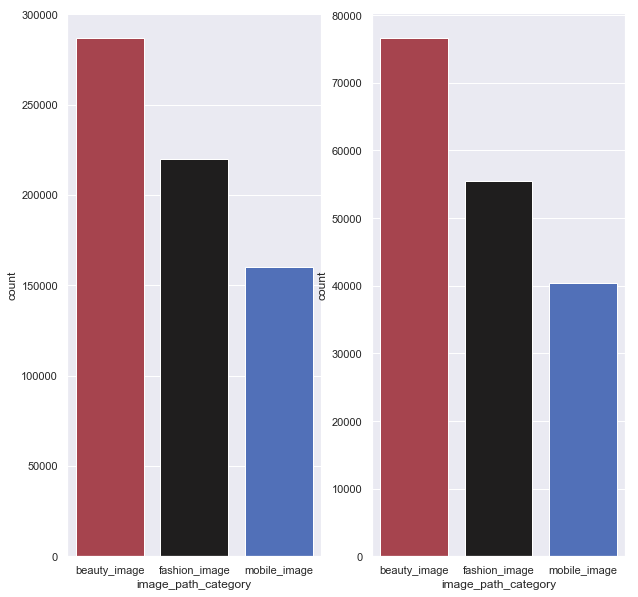

In [19]:
f, axes = plt.subplots(1, 2,)
sns.countplot(x='image_path_category', data=train_df, palette='icefire_r', ax=axes[0])
sns.countplot(x='image_path_category', data=test_df, palette='icefire_r', ax=axes[1])

/Users/sunyitao/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'\nCheck if there is no overlap in categories between the image_path_categories\n'

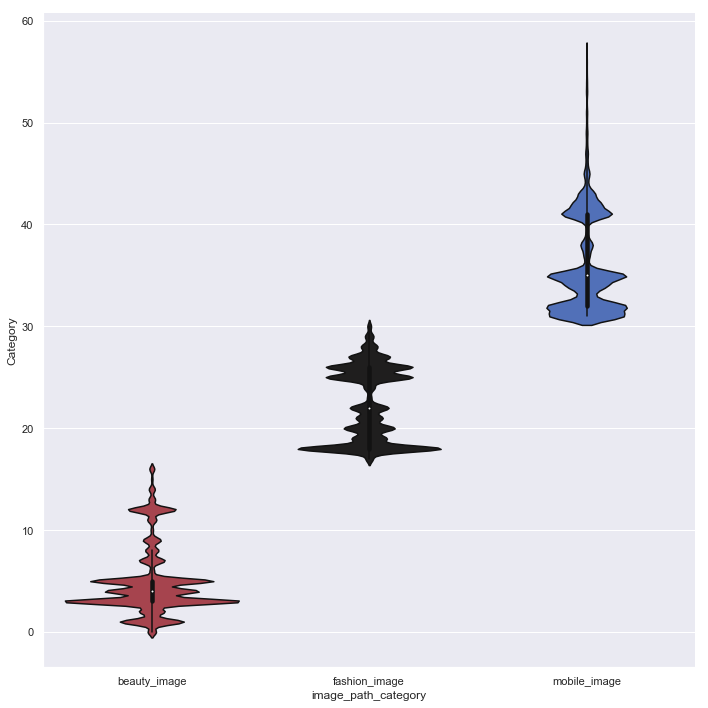

In [8]:
sns.set(rc={'figure.figsize':(10,10)})
sns.catplot(x='image_path_category', y='Category', data=train_df, 
            kind='violin', palette='icefire_r', height=10)

#### Check that categories betweeen beauty, fashion and mobile image do not overlap

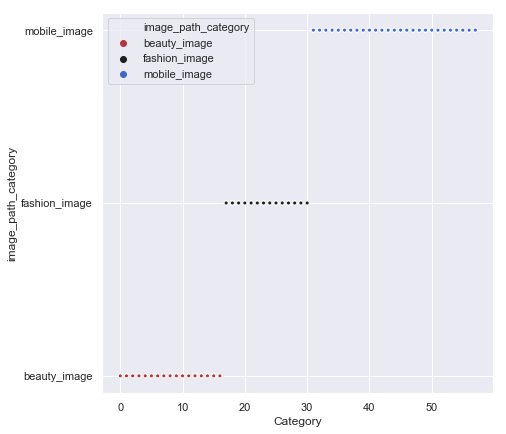

In [41]:
sns.set(rc={'figure.figsize':(7,7)})
sns.scatterplot(x='Category', y='image_path_category', data=train_df, 
                hue='image_path_category', palette='icefire_r', s=15)

#### Checking significance of itemid column. It seems that itemid may be datetime based as some itemids are missing for mobile category which may have not been released at a earlier date

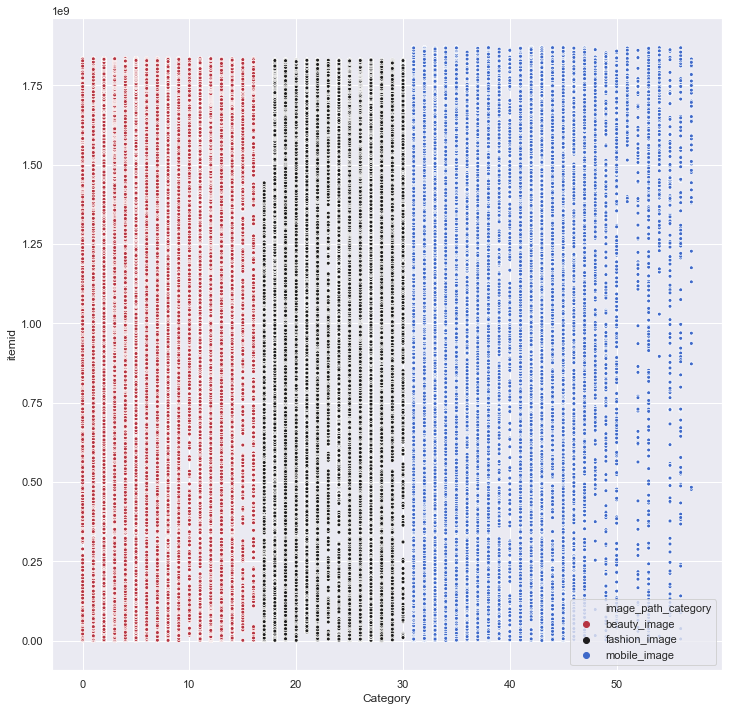

In [7]:
sns.set(rc={'figure.figsize':(12,12)})
sns.scatterplot(x='Category', y='itemid', data=train_df, 
                hue='image_path_category', palette='icefire_r', s=15)

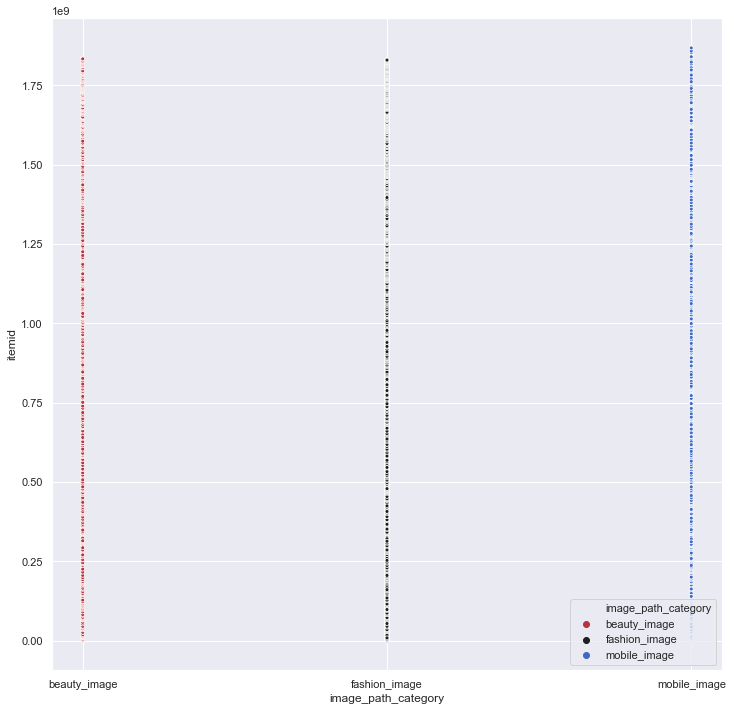

In [35]:
sns.scatterplot(x='image_path_category', y='itemid', data=test_df,
                hue='image_path_category',palette='icefire_r', s=15)

In [ ]:
train_df['first']

#### Check for item id duplicates.

In [50]:
train_df['itemid'].value_counts()

804259839     1
794383232     1
685297446     1
1098443095    1
1463401373    1
229225372     1
914592187     1
1383674041    1
15328150      1
1177156501    1
976593103     1
1509544848    1
1798067049    1
997786506     1
1808339848    1
1166633863    1
1493787526    1
1107169726    1
33115011      1
23618470      1
415787943     1
1358437289    1
1793647542    1
1439416888    1
1746445246    1
1553575171    1
55086011      1
569934778     1
146316217     1
1393071032    1
             ..
1821596525    1
1851807872    1
1734780800    1
1794666637    1
1221955205    1
1670467453    1
1358516807    1
1708228475    1
1139894136    1
1835454349    1
1455083131    1
1306183727    1
62295102      1
1675100075    1
890763178     1
578285481     1
1554507688    1
1066901415    1
703043494     1
1550737826    1
1185618035    1
1469464467    1
1606920096    1
109469599     1
60182429      1
1533429660    1
922122138     1
885417880     1
970327956     1
529918513     1
Name: itemid, Length: 66

#### Detected Languages

In [3]:
word2lang = os.path.join(cwd, 'data_utils', 'word_to_lang.json')
with open(word2lang, 'r') as f:
     word2lang = json.load(f)

In [4]:
language_counts = {}
for word, lang in word2lang.items():
    if lang in language_counts.keys():
        language_counts[lang] += 1
    else:
        language_counts[lang] = 1

In [11]:
result_list = sorted([[lang, counts] for lang, counts in language_counts.items()], 
                     key = lambda x: x[1], reverse=True)

In [12]:
result_list

[['id', 5746],
 ['fr', 1153],
 ['ms', 1061],
 ['hi', 942],
 ['it', 934],
 ['zh-CN', 778],
 ['es', 769],
 ['ro', 690],
 ['de', 662],
 ['nl', 635],
 ['ja', 604],
 ['vi', 564],
 ['sv', 538],
 ['pt', 532],
 ['pl', 475],
 ['la', 443],
 ['fi', 421],
 ['tr', 397],
 ['da', 392],
 ['no', 387],
 ['ar', 386],
 ['cy', 381],
 ['tl', 331],
 ['et', 320],
 ['ru', 287],
 ['sl', 286],
 ['el', 282],
 ['ca', 270],
 ['bg', 266],
 ['sq', 261],
 ['jw', 244],
 ['hu', 240],
 ['cs', 222],
 ['so', 222],
 ['eu', 220],
 ['uz', 210],
 ['su', 205],
 ['af', 193],
 ['sw', 180],
 ['lt', 179],
 ['is', 174],
 ['eo', 174],
 ['bs', 172],
 ['lv', 172],
 ['bn', 163],
 ['sk', 162],
 ['hr', 161],
 ['mg', 155],
 ['mt', 151],
 ['fy', 149],
 ['ku', 136],
 ['ht', 134],
 ['haw', 132],
 ['co', 120],
 ['gl', 106],
 ['gd', 103],
 ['ga', 99],
 ['ceb', 99],
 ['az', 97],
 ['hmn', 94],
 ['ha', 93],
 ['mi', 88],
 ['zu', 82],
 ['lb', 79],
 ['ig', 74],
 ['te', 68],
 ['ml', 66],
 ['gu', 57],
 ['ta', 56],
 ['mr', 55],
 ['xh', 43],
 ['kn', 42],

In [39]:
psychic_learners_dir = Path.cwd().parent
BIG_CATEGORY = 'fashion'
TRAIN_CSV = str(psychic_learners_dir / 'data' / f'{BIG_CATEGORY}_train_split.csv')
VALID_CSV = str(psychic_learners_dir / 'data' / f'{BIG_CATEGORY}_valid_split.csv')
TEST_CSV = str(psychic_learners_dir / 'data' / f'{BIG_CATEGORY}_test_split.csv')

In [40]:
train_df = pd.read_csv(TRAIN_CSV)
valid_df = pd.read_csv(VALID_CSV)
test_df = pd.read_csv(TEST_CSV)

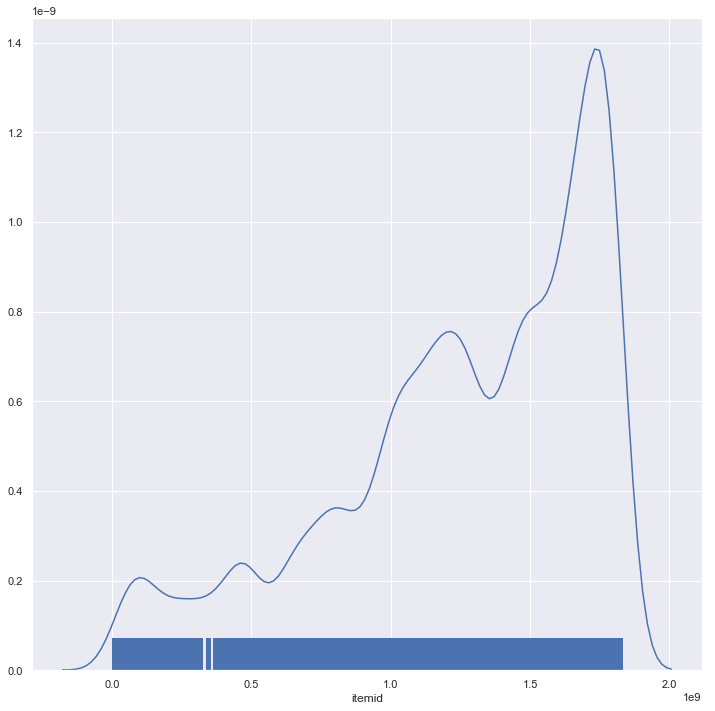

In [41]:
sns.set(rc={'figure.figsize':(12,12)})
sns.distplot(valid_df['itemid'], hist=False, rug=True)

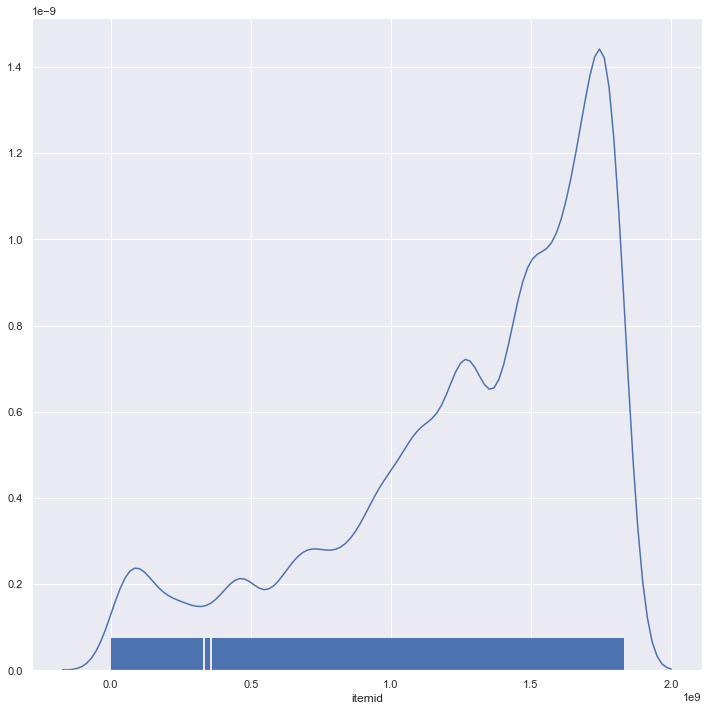

In [42]:
sns.set(rc={'figure.figsize':(12,12)})
sns.distplot(test_df['itemid'], hist=False, rug=True)

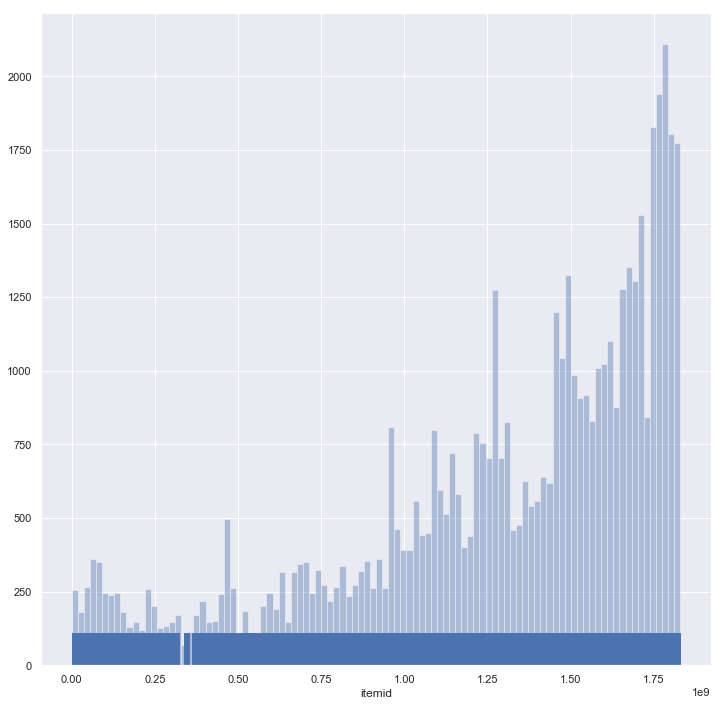

In [43]:
sns.distplot(test_df['itemid'], bins=100, kde=False, rug=True)

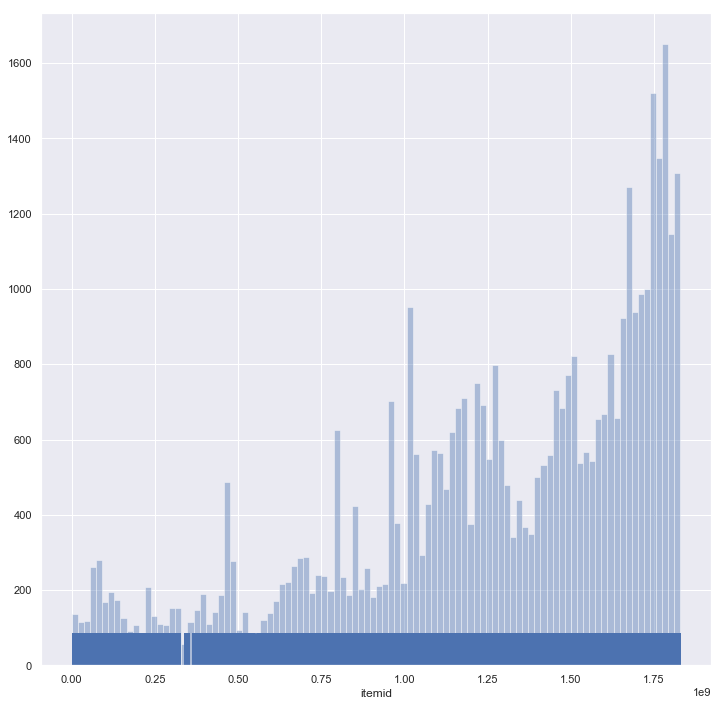

In [44]:
sns.distplot(valid_df['itemid'], bins=100, kde=False, rug=True)